# Predict whether the customer would quit the bank(Binary classification)

In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 996.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 2.2 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 3.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.1

# Part 1

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.16.1


### Import some basic libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
dataset.head(-1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


### Dividing the data set into dependent and independent variables

In [11]:
x=dataset.iloc[:,3:13]
#selecting the independent variables
# here [column,row] all the column will be selected and the rows from 3 that is Credit score until EstimatedSalary will be selected

In [12]:
y=dataset.iloc[:,13]
#selecting the dependent variable

In [13]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Feature Engineering
#### Handeling the catogorical features such as geography and Gender

In [15]:
geography=pd.get_dummies(x['Geography'])

In [16]:
print(geography)

      France  Germany  Spain
0       True    False  False
1      False    False   True
2       True    False  False
3       True    False  False
4      False    False   True
...      ...      ...    ...
9995    True    False  False
9996    True    False  False
9997    True    False  False
9998   False     True  False
9999    True    False  False

[10000 rows x 3 columns]


In [17]:
geography=pd.get_dummies(x['Geography'],drop_first=True)

In [18]:
print(geography)

      Germany  Spain
0       False  False
1       False   True
2       False  False
3       False  False
4       False   True
...       ...    ...
9995    False  False
9996    False  False
9997    False  False
9998     True  False
9999    False  False

[10000 rows x 2 columns]


In [19]:
gender=pd.get_dummies(x['Gender'])

In [20]:
print(gender)

      Female   Male
0       True  False
1       True  False
2       True  False
3       True  False
4       True  False
...      ...    ...
9995   False   True
9996   False   True
9997    True  False
9998   False   True
9999    True  False

[10000 rows x 2 columns]


In [21]:
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [22]:
print(gender)

       Male
0     False
1     False
2     False
3     False
4     False
...     ...
9995   True
9996   True
9997  False
9998   True
9999  False

[10000 rows x 1 columns]


#### Above in geography if two catogory values are known we can predict the third catogory. 
#### Therefore two columns is enough. 
#### It's the same with the gender as well.

### Concatanate these variables with dataframe

In [27]:
x.drop(['Geography','Gender'],axis=1)
# Axis =1 means drop the columns not the rows

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [28]:
X=x.drop(['Geography','Gender'],axis=1)

In [30]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [31]:
geography_binary = geography.astype(int)

In [32]:
print(geography_binary)

      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]


In [33]:
gender_binary=gender.astype(int)

In [34]:
print(gender_binary)

      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [35]:
pd.concat([X,geography_binary,gender_binary],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [36]:
X=pd.concat([X,geography_binary,gender_binary],axis=1)

### Splitting the datas into training and test set

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
# X_train = X_train.to_frame() if isinstance(X_train, pd.Series) else X_train
# X_test = X_test.to_frame() if isinstance(X_test, pd.Series) else X_test
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [54]:
print(X_train)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]


In [55]:
print(X_test)

[[-0.55204276 -0.36890377  1.04473698 ...  1.75486502 -0.57369368
  -1.09168714]
 [-1.31490297  0.10961719 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 [ 0.57162971  0.30102557  1.04473698 ... -0.5698444   1.74309049
  -1.09168714]
 ...
 [-0.74791227 -0.27319958 -1.37744033 ... -0.5698444   1.74309049
   0.91601335]
 [-0.00566991 -0.46460796 -0.33936434 ...  1.75486502 -0.57369368
   0.91601335]
 [-0.79945688 -0.84742473  1.04473698 ...  1.75486502 -0.57369368
   0.91601335]]


In [56]:
X_train.shape

(8000, 11)

# Part 2

### Creating the ANN model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Dense is used to create neurons and the layers
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
#To deactivate neurons in the hidden layer

In [59]:
# Initializing the ANN
classifier=Sequential()

In [60]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [61]:
# Adding H1
classifier.add(Dense(units=7,activation='relu'))

In [62]:
# Adding H2
classifier.add(Dense(units=6,activation='relu'))

In [63]:
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [66]:
# Train the model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# By default adam uses 0.1 as learning rate

In [68]:
# Defining a new learning rate
tf.keras.optimizers.Adam(learning_rate=0.01)

In [69]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [70]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# we are focusing on the validation loss here

In [73]:
# Early stopping(Automatically stop when the monitored matric stopps improving)
Early_stopping=tf.keras.callbacks.EarlyStopping(
                monitor="val_loss",
                min_delta=0.0001,
                patience=20,
                verbose=1,
                mode="auto",
                baseline=None,
                restore_best_weights=False,
                start_from_epoch=0,
            )

In [74]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=Early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8666 - loss: 0.3075 - val_accuracy: 0.8451 - val_loss: 0.4629
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8766 - loss: 0.2907 - val_accuracy: 0.8448 - val_loss: 0.4934
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8804 - loss: 0.2934 - val_accuracy: 0.8440 - val_loss: 0.4731
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8725 - loss: 0.3004 - val_accuracy: 0.8466 - val_loss: 0.5011
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.8764 - loss: 0.2921 - val_accuracy: 0.8466 - val_loss: 0.5078
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.8754 - loss: 0.3075 - val_accuracy: 0.8474 - val_loss: 0.4894
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8672 - loss: 0.3148 - val_accuracy: 0.8440 - val_loss: 0.5572
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8790 -

In [76]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

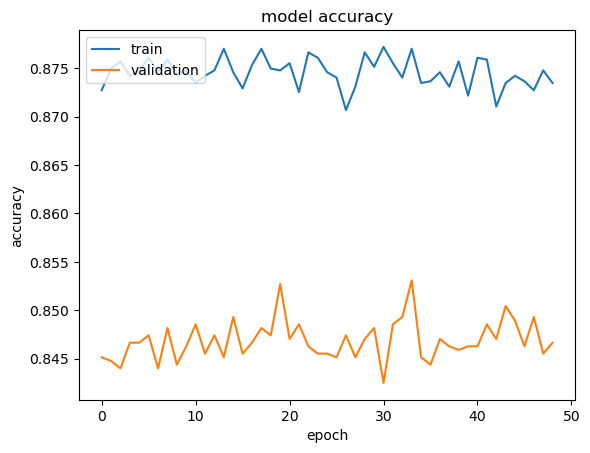

In [78]:
#  "Accuracy"
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

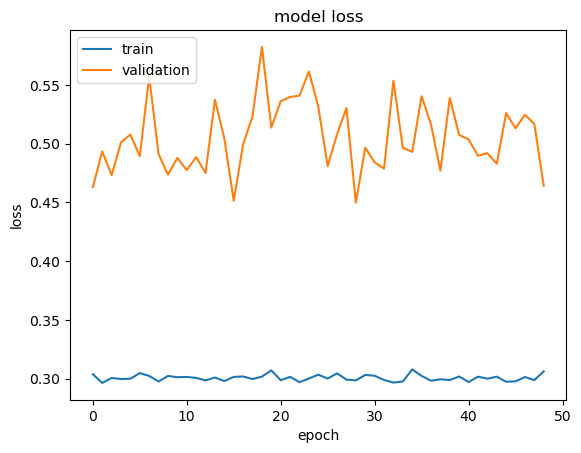

In [79]:
# "Loss"
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Part 3

### Making the predictions and evaluating the model

In [80]:
# Predicting the test set results
y_predicted=classifier.predict(X_test)
y_predicted=(y_predicted>=0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


In [84]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[1527,   68],
       [ 205,  200]])

In [85]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predicted)

In [86]:
score

0.8635

In [87]:
score1=accuracy_score(y_predicted,y_test)

In [88]:
score1

0.8635

In [89]:
# Get the weights
classifier.get_weights()

[array([[ -0.72776514,   0.934449  ,   6.282545  ,  -5.1874194 ,
          -1.1146675 ,  -0.9831972 ,  -0.3931082 ,   1.4370906 ,
          -3.8530395 ,  -2.1778622 ,  -6.289228  ],
        [ -1.8681351 ,  -5.689989  ,  -1.3225691 ,   3.0121973 ,
          -5.9857273 ,   2.6475325 ,  -2.1775844 , -12.632354  ,
          -2.9885204 , -10.042398  ,  -2.7294664 ],
        [  2.2470376 ,   0.8345502 ,   4.6651926 ,   0.78877723,
           5.5434146 ,   3.9764416 ,  -1.3326523 ,  -0.8940149 ,
           2.7510812 ,   2.3973186 ,  -1.0044819 ],
        [  4.3638906 ,  -7.952788  ,  -8.668764  ,  -6.086139  ,
          -3.2156012 ,  -5.8668017 ,   1.2339921 ,  -1.4066696 ,
         -11.958046  ,   2.1208324 ,   2.0746212 ],
        [ 12.158583  ,   3.5119996 ,  -1.4388353 , -12.851908  ,
           2.7222693 ,   1.4364102 , -12.902654  ,  -1.4008223 ,
          -2.3930373 ,  -1.3894796 ,   5.0897093 ],
        [ -0.35276732,  -3.8870811 ,  -1.4228524 ,  -0.24208795,
           0.30642423,  -